In [41]:
from dataset.tiny_celebrities import train_loader
import matplotlib.pyplot as plt
import einops

In [42]:
example = next(iter(train_loader))
image = example['image']

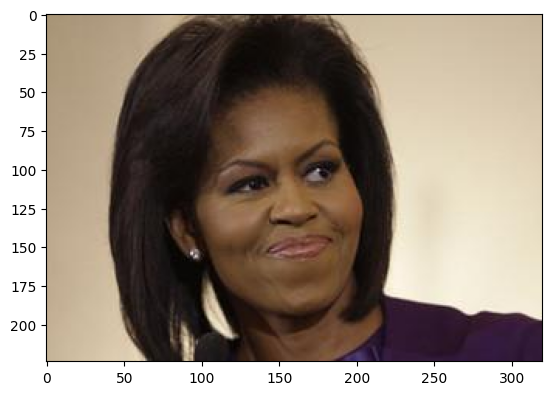

In [43]:
plt.imshow(einops.rearrange(image, '1 c h w -> h w c'))

In [44]:
from face import align_faces, assess_quality, detect_faces

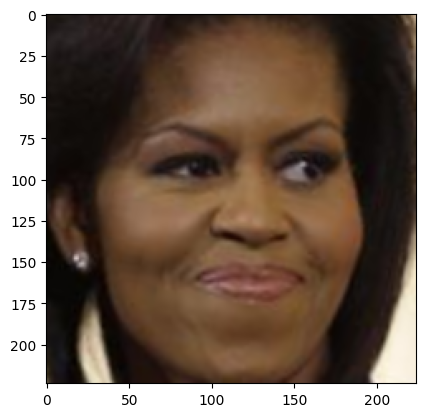

[1,
 [{'confidence': np.float64(0.9990205764770508),
   'roll': np.float64(-10.840305454330567),
   'pitch': np.float64(6.042402826855138),
   'yaw': np.float64(15.363786202024997)}]]

In [45]:
face_detections = detect_faces(image)

image_ok, image_message, faces_ok_and_messages, qualities = assess_quality(image, face_detections, single_face_only=False, min_confidence=0.97)
if not image_ok:
    print(image_message)
else:
    for face_image, (face_ok, face_message) in zip(align_faces(image, face_detections), faces_ok_and_messages):
        if not face_ok:
            print(face_message)
        else:
            plt.imshow(einops.rearrange(face_image, 'c h w -> h w c'))
            plt.show()
            
qualities

In [46]:
batched_face_image = einops.rearrange(face_image, 'c h w -> 1 c h w')

In [47]:
from resnet import feature_extractor

In [48]:
features = feature_extractor.forward(batched_face_image)
features.shape

torch.Size([1, 2048])